In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.mean()

<ipython-input-3-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Age                         54.433333
Sex                          0.677778
Chest pain type              3.174074
BP                         131.344444
Cholesterol                249.659259
FBS over 120                 0.148148
EKG results                  1.022222
Max HR                     149.677778
Exercise angina              0.329630
ST depression                1.050000
Slope of ST                  1.585185
Number of vessels fluro      0.670370
Thallium                     4.696296
dtype: float64

In [4]:
df.median()

<ipython-input-4-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                         55.0
Sex                          1.0
Chest pain type              3.0
BP                         130.0
Cholesterol                245.0
FBS over 120                 0.0
EKG results                  2.0
Max HR                     153.5
Exercise angina              0.0
ST depression                0.8
Slope of ST                  2.0
Number of vessels fluro      0.0
Thallium                     3.0
dtype: float64

In [5]:
df.mode()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,54,1,4,120,234,0,2,162,0,0.0,1,0,3,Absence


In [6]:
df.dropna(inplace=True)

In [7]:
df[df['Heart Disease'] == 'Presence'].mode()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58.0,1.0,4.0,120,254,0.0,2.0,125,1.0,0.0,2.0,0.0,7.0,Presence
1,NaN,NaN,NaN,140,282,NaN,NaN,132,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# anova

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Assuming 'target' is your dependent variable
model = sm.OLS.from_formula('Sex ~ Age+ BP + Cholesterol', df).fit()
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
# Extract the F-statistic and associated p-value
f_statistic = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 0.5826074212036295
P-Value: 0.4459685263429658


In [10]:
import scipy.stats as stats
group_a_column = df['Age']
group_b_column = df['Cholesterol']
# Perform a two-sample t-test assuming unequal variances (welch's t-test)
t_statistic, p_value = stats.ttest_ind(group_a_column, group_b_column, equal_var=False)
# Display the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
# etermine whether the difference is statistically significant at a significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value:
  print("The difference is statistically significant,")
else:
  print("The difference is not statistically significănt.")

T-Statistic: -61.12270159945927
P-Value: 4.254112038207553e-166
The difference is statistically significant,


In [11]:
import scipy.stats as stats
# Perform the chi-square test of independence
df_test = df.iloc[:, :-1]
chi2_stat, p_value, dof, expected = stats.chi2_contingency(df_test)

# Display the results
print ("chi-Square Statistic:", chi2_stat)
print ("p-Value:", p_value)
print ("Degrees of Freedom:", dof)
print ("Expected Frequencies Table:")
print (pd.DataFrame(expected, index=df.index, columns=df_test.columns))
# Determine whether there is a significant association between the variables
alpha = 0.05
if p_value < alpha:
   print ("There is a significant association between the variables.")
else:
   print ("There is no significant association between the variables.")

chi-Square Statistic: 4848.766311773586
p-Value: 3.465435593123995e-69
Degrees of Freedom: 3228
Expected Frequencies Table:
           Age       Sex  Chest pain type          BP  Cholesterol  \
0    58.974820  0.734326         3.438894  142.302786   270.488854   
1    83.823557  1.043731         4.887854  202.261332   384.457939   
2    54.054188  0.673057         3.151966  130.429590   247.920305   
3    52.407914  0.652558         3.055969  126.457226   240.369645   
4    54.045093  0.672944         3.151435  130.407643   247.878589   
..         ...       ...              ...         ...          ...   
265  54.436197  0.677813         3.174241  131.351354   249.672392   
266  55.573126  0.691970         3.240537  134.094699   254.886937   
267  59.420497  0.739876         3.464882  143.378178   272.532955   
268  50.061291  0.623339         2.919135  120.794962   229.606825   
269  58.074372  0.723114         3.386387  140.130057   266.358935   

     FBS over 120  EKG results     

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [13]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
X = slr.fit_transform(X)
X

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_lin_reg

array([ 1.00871951,  0.9383837 ,  0.66970688,  0.77193917,  0.07432041,
        0.43808827,  0.5207262 ,  0.2097573 ,  0.71115403, -0.03078047,
        0.96670316,  1.36480362,  0.36122821,  0.12092202,  0.39487485,
       -0.05817673,  0.2614648 ,  0.23822217, -0.10031885,  0.24688023,
        1.0157448 ,  0.4682309 ,  0.85996055,  0.58005011,  0.12179622,
        0.38390433,  0.00287542,  0.6886825 ,  0.3221008 , -0.0195463 ,
        0.85748233,  0.12030562,  0.47368003,  0.87503039,  0.06306826,
        0.18865905,  0.20985637,  0.29421171,  0.091263  ,  0.10607625,
        0.50804893,  0.70428188,  0.29686711,  0.29236529, -0.02072641,
        0.27561401,  0.42518132,  0.50510466,  0.81092966,  0.87313846,
        0.47192725,  0.04150402,  0.20426559,  0.62585857,  0.48022554,
       -0.06225314,  0.52909007,  0.71489215,  0.72172463,  0.75655969,
        0.69629441, -0.11516971,  0.04329444,  0.71512303,  0.30435872,
        0.06327666,  0.24642646,  0.89094714,  0.26522615,  0.04

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_log_reg))

[[44  6]
 [ 5 26]]
0.8641975308641975


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [26]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_des = des_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_des))
print(accuracy_score(y_test, y_pred_des))

[[41  9]
 [10 21]]
0.7654320987654321


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [29]:
from sklearn.ensemble import RandomForestClassifier
rnd_tree = RandomForestClassifier(n_estimators = 100)
rnd_tree.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred_rnd = rnd_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_rnd))
print(accuracy_score(y_test, y_pred_rnd))

[[46  4]
 [ 4 27]]
0.9012345679012346


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors = 15)
knn_cls.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [33]:
y_pred_knn = knn_cls.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[45  5]
 [ 4 27]]
0.8888888888888888


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [35]:
from sklearn.svm import SVC
svm_cls = SVC(kernel='rbf')
svm_cls.fit(X_train, y_train)

SVC()

In [36]:
y_pred_scv = svm_cls.predict(X_test)
print(confusion_matrix(y_test, y_pred_scv))
print(accuracy_score(y_test, y_pred_scv))

[[45  5]
 [ 4 27]]
0.8888888888888888


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [38]:
from sklearn.neural_network import MLPClassifier
mlp_cls = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(75,), max_iter = 10000)
mlp_cls.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(75,), max_iter=10000,
              solver='lbfgs')

In [39]:
y_pred_mlp = mlp_cls.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print(accuracy_score(y_test, y_pred_mlp))

[[41  9]
 [10 21]]
0.7654320987654321


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [41]:
from sklearn.cluster import KMeans
wcss = []
for cls in range(1, 11):
  kms = KMeans(n_clusters = cls, init = 'k-means++', n_init = 'auto')
  kms.fit(X)
  wcss.append(kms.inertia_)

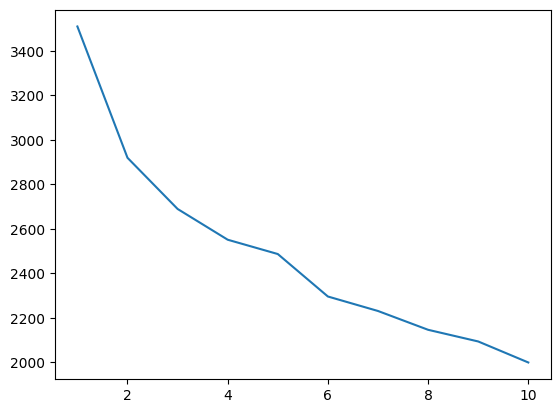

In [42]:
plt.plot(range(1, 11), wcss)

In [43]:
kms_cls = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto')
y_kmeans = kms_cls.fit_predict(X)

In [44]:
print(confusion_matrix(y, y_kmeans))
print(accuracy_score(y, y_kmeans))

[[ 18 132]
 [ 90  30]]
0.17777777777777778


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774


In [46]:
from sklearn.decomposition import PCA
pca = PCA(0.8)
X_pca = pca.fit_transform(X)

In [47]:
print(X_pca.shape, X.shape)

(270, 8) (270, 13)


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.8125
Recall: 0.8387096774193549
F1-Score: 0.8253968253968254
AUC-ROC: 0.8593548387096774
